# IMPORT NECESSARY PACKAGES AND LOADING DATA 

In [53]:
# for data loading, manipulation and analysis
import pandas as pd
# For plotting 
import matplotlib
from matplotlib import pyplot as plt
# Display plot and charts inline without calling plt.show explicitly
%matplotlib inline
#Adjust matplot font
font = {
    "weight" : "normal",
    "size" : 14
}
matplotlib.rc("font", **font)
# working with arrays - calculation of some metrics
import numpy as np
# For plotting
import seaborn as sns
sns.set_color_codes("dark")
# For scientific computing
from scipy import stats
# Suppress dependency warnings - especially depreciation warnings
import warnings
warnings.filterwarnings("ignore")

In [54]:
# Loading the data using pandas package
df =  pd.read_csv("AxisInsurance.csv")
# Display first 6 rows
df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


# EXPLORATORY DATA ANALYSIS

## Structure of the Data

In [55]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [56]:
# Check information about the dataset: datatypes, shape of the data,
# size of data file, attributes, deduce availability missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [57]:
# Check for missing values
df.isnull().sum() # No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
# Shape of the dataset
rows, cols = df.shape
print("The dataset has ",rows,"rows.")
print("The dataset has ",cols,"columns.")

The dataset has  1338 rows.
The dataset has  7 columns.


## Univariate Analysis

In [59]:
# Number of men and women on the dataset
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

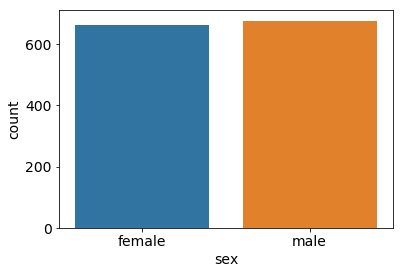

In [60]:
#Visual
sns.countplot(df["sex"]);

In [61]:
# Number of children per individual
df_children = pd.DataFrame(df["children"].value_counts())
df_children["percent"] = round(df_children["children"]/sum(df_children["children"]),3)*100   
df_children

,children,percent
0,574,42.9
1,324,24.2
2,240,17.9
3,157,11.7
4,25,1.9
5,18,1.3


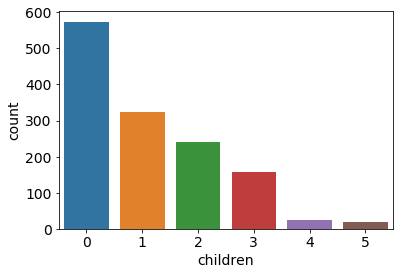

In [62]:
sns.countplot(df["children"]);

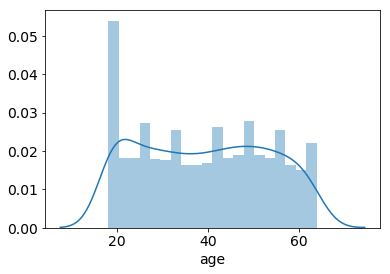

In [63]:
# Distribution of age

sns.distplot(df["age"], bins=20, kde=True);

In [64]:
def BMI_Label(value):
    """
    A function to generate BMI remark.
    value between 18.5 and 24.9 is ideal,
    <18.5 is underwight and >24.9 is overweight.
    """
    if 18.5<=value<=24.9:
        return "Ideal"
    elif value<18.5:
        return "Underweight"
    elif value>24.9:
        return "Overweight"

In [65]:
# Apply BMI_label function to generate BMI remark
df["bmi_remark"] = df["bmi"].apply(BMI_Label)

In [66]:
# Calculate distribution of individuals by the new bmi_remark variable
df_bmi = pd.DataFrame(df["bmi_remark"].value_counts())
df_bmi["percent"] = round(df_bmi["bmi_remark"]/sum(df_bmi["bmi_remark"]),3)*100
df_bmi

# Conclusion/Remark: Majority of the individuals are overweight. In fact,
# approximately 82% of all the people are overweight, 16.6% have ideal
# body weight and only 1.5% are underweight.

,bmi_remark,percent
Overweight,1096,81.9
Ideal,222,16.6
Underweight,20,1.5


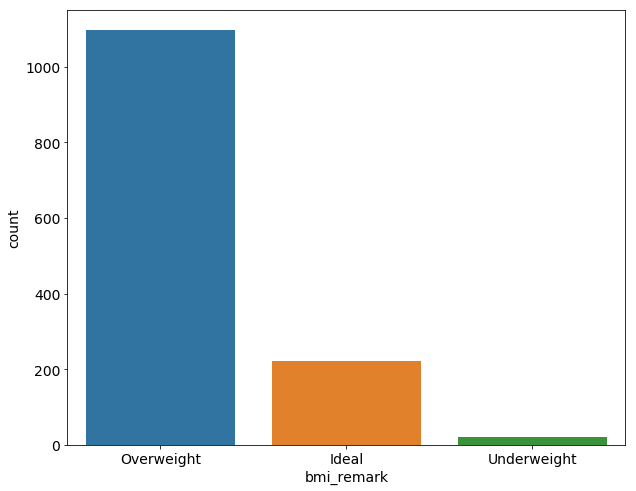

In [67]:
# Visualization of the above information
plt.figure(figsize=(10,8))
sns.countplot(df["bmi_remark"]);
#saving the plot
plt.savefig("charts/count-bmi-remark.PNG")

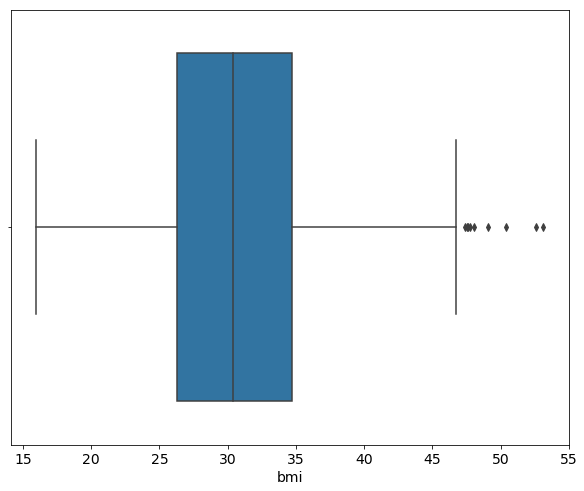

In [68]:
# Boxplot for Age showing that there are upper outliers on Age values 
# and no lower outliers.

plt.figure(figsize=(10,8))

sns.boxplot(df["bmi"]); 

plt.savefig("charts/boxplot-bmi.png")

In [69]:
# first quantile - 25th percentile
q1 = df["bmi"].quantile(0.25)
print("First quantile(q1): ", q1)
# second quantile - 50th percentile - the median
q2 = df["bmi"].quantile(0.50)
print("Second Quantile (q2/Median of BMI): ", q2)
# third quantile - 75th percentile
q3 = df["bmi"].quantile(0.75)
print("Third quantile(q3): ", q3)
# The interquantile range
IQR = q3 - q1
print("Interquantile Range(q3-q1): ", IQR)
# Defining the threshold to use when defining the upper outliers
# Only checking the upper outliers because we have already discovered that there
# are no lower outliers in the boxplot above
threshold = q3+1.5*(q3-q1)
print("Threshold for upper outliers: ",threshold) #47.29
# Identifying outliers by filtering the dataframe using the threshold
df_upper_outliers = df[df["bmi"]>threshold]
# Number of outliers
print("Number of outliers:",len(df_upper_outliers))
#Showing some few outliers
df_upper_outliers.head()

First quantile(q1):  26.29625
Second Quantile (q2/Median of BMI):  30.4
Third quantile(q3):  34.69375
Interquantile Range(q3-q1):  8.3975
Threshold for upper outliers:  47.290000000000006
Number of outliers: 9


,age,sex,bmi,children,smoker,region,charges,bmi_remark
116,58,male,49.06,0,no,southeast,11381.32540,Overweight
286,46,female,48.07,2,no,northeast,9432.92530,Overweight
401,47,male,47.52,1,no,southeast,8083.91980,Overweight
543,54,female,47.41,0,yes,southeast,63770.42801,Overweight
847,23,male,50.38,1,no,southeast,2438.05520,Overweight


In [70]:
# Smokers count
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

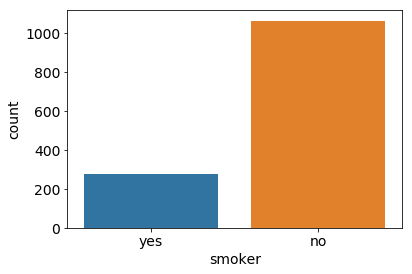

In [71]:
sns.countplot(df["smoker"]);

## Bivariate and Multivariate Analysis

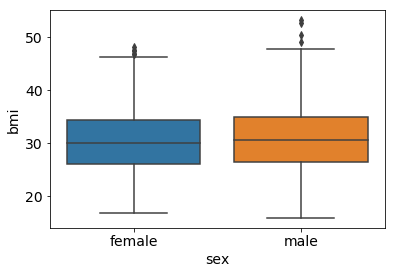

In [72]:
sns.boxplot(df["sex"],df["bmi"]);

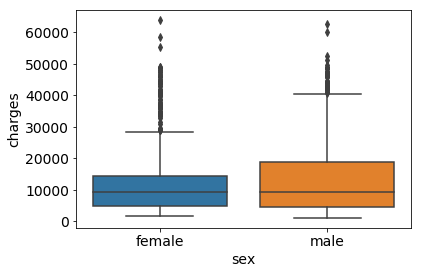

In [73]:
sns.boxplot(df["sex"],df["charges"]);

In [74]:
# df_sex_bmi = df[["sex","bmi_remark"]]
# df_sex_bmi.set_index(df["sex"],inplace=True, drop = True)
# df_sex_bmi["count"] = df_sex_bmi.groupby("bmi_remark").count()


In [75]:
# df_sex_bmi

In [76]:
# Mean of income by Marital status
df[["sex","charges"]].groupby("sex").mean()

,charges
sex,
female,12569.578844
male,13956.751178


In [77]:
# Mean of income by smoking status
df[["smoker","charges"]].groupby("smoker").mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


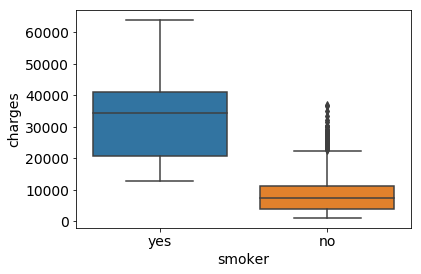

In [78]:
sns.boxplot(df["smoker"],df["charges"]);

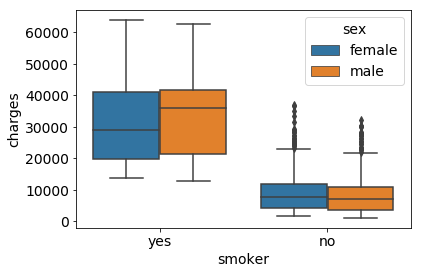

In [79]:
sns.boxplot(df["smoker"],df["charges"], hue = df["sex"]);

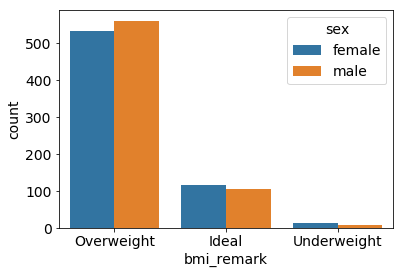

In [80]:
sns.countplot(df["bmi_remark"], hue = df["sex"]);

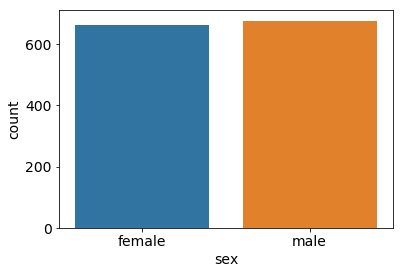

In [81]:
sns.countplot(df["sex"]);

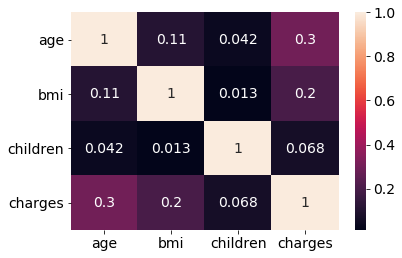

In [82]:
# plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

# General remark: There is no relationship between the continous variables
# Considering the correlation scores, scatter plot will make the same 
# conclusions - no correlation between continous variables.

# HYPOTHESIS TESTING SECTION

## Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

In [83]:
from scipy.stats import ttest_ind
import numpy as np
from statsmodels.stats.weightstats import ztest

### Step 1: Data Preparation

In [84]:
# Just for convenience, we will filter the columns we need only
df_smoking = df[["smoker","charges"]]
df_smoking.head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [85]:
#Defining the two groups
# Group of smokers - first group
smokers_group = df_smoking[df_smoking["smoker"]=="yes"]
smokers_group_claims = np.array(smokers_group["charges"])

# Group of non-smokers - second group
non_smokers_group = df_smoking[df_smoking["smoker"]=="no"]
non_smokers_group_claims = np.array(non_smokers_group["charges"])

In [86]:
print("There are ",len(smokers_group_claims)," smokers (n1).")
print("There are ",len(non_smokers_group_claims),"non-smokers (n2).")

There are  274  smokers (n1).
There are  1064 non-smokers (n2).


### Step 2: Statement of null and alternate hypothesis

* $H_0$: $\mu1$ = $\mu2$ ( There is no difference in mean claims between two groups)  
* $H_A$: $\mu1$ != $\mu2$ ( Mean claims are not the same)

### Step 3: State the Level of Significance (α)

The claim is tested at α = 0.05

### Step 4: Identify the test statistic

Two-sample t-test or z-test are possible choices.

We will make a choice of the test statistic based on the answers to the following questions.
- is the sample large? Answer: n1>30 and n2>30 and therefore the sample is large enough to invoke the application of Central Limit Theorem (CLT). Therefore we will pick z-test.
- is the population variance known? Answer: Not explicitly stated. For unknown population variance, we pick t-test and for known variance we go for z-test. Therefore, t-test is a right choice.
- t-test assumes the equality of variance in standard deviation.

Pick: Two-sample t-test. We will, however, compute z-statistic as well.

### Step 5: Calculate statistic and p value

- scipy.stats.ttest_ind is used to perfom two-sample t-test
- from statsmodels.stats.weightstats.ztest performs two-sample z-test

In [35]:
# two-sample t-test

# This test assumes that the two groups have the equal variance
t_statistic, p_value = ttest_ind(smokers_group_claims, non_smokers_group_claims)
print("t-statistic =",t_statistic)
print("p value =",p_value)
# p_value is so small. Literally, zero.

t-statistic = 46.664921172723716
p value = 8.271435842177219e-283


In [36]:
#two-sample z-test
z_statistic, p_value2 = ztest(smokers_group_claims, non_smokers_group_claims, alternative='two-sided')
print("z-statistic =",z_statistic)
print("p value =",p_value2)

z-statistic = 46.664921172723716
p value = 0.0


Note: t-test and z-test statistics are equal because the sample sizes are too large that the sampling distribution approaches normal by Central Limit Theorem and effectively t-test approaches z-test.

### Step 6:  Decide to reject or fail to reject null hypothesis

p_value < 0.05 implies that we reject null hypothesis in favor of
alternative hypothesis.

### Step 7:  Conclusion

The mean claims made by smokers and non-smokers are not the same
at 5% level of significance/tolerance

In [37]:
###################################################################################

## Is the proportion of smokers significantly different across different regions?

### Step 1: Data Preparation

In [87]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_remark
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Overweight
2,28,male,33.000,3,no,southeast,4449.46200,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,Ideal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [89]:
# Cross-tabulation of smoker and region
contingency = pd.DataFrame(pd.crosstab(df["smoker"],df["region"]\
                         ,margins=False))
contingency

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Step 2: Statement of null and alternate hypothesis

* $H_0$: There is no difference in proportion of smokers in different regions  
* $H_A$: The proportion of smokers in different regions are different

### Step 3: Level of significance (alpha)

Alpha = 0.05

### Step 4: Test statistic to use

In this problem we are comparing proportion of two groups in different regions. The most appropriate test is the Chi-squared test

### Step 5: Calculate the statistic and p value

In [90]:
# Array of observed values for smokers and no smokers across regions
observed = np.array([np.array(contingency.loc["no"]), np.array(contingency.loc["yes"])])
# chi squared statistic: the output is the statistic itself, p value,
# degrees of freedom and espected values by the test
chi2_statistic, p_value, degree_of_freedom, expected\
= stats.chi2_contingency(observed=observed)
stats.chi2_contingency(observed=obs)
print("chi_squared_statistic = ", chi2_statistic)
print("Degrees of Freedom =", degree_of_freedom)
print("p-value =",p_value)
print("Expected values:")
pd.DataFrame(expected, \
             columns=["northeast","northwest","southeast","southwest"],\
            index=["no","yes"])

chi_squared_statistic =  7.34347776140707
Degrees of Freedom = 3
p-value = 0.06171954839170547
Expected values:


,northeast,northwest,southeast,southwest
no,257.650224,258.445441,289.458894,258.445441
yes,66.349776,66.554559,74.541106,66.554559


### Step 6: Deciding to reject null or not

At 5% level of significance, we fail to reject null hypothesis because p>0.05

### Step 7: Conclusion

Based on data, we cannot find sufficient evidence to suggest that the proportion of smokers are different across the 4 regions

In [40]:
###################################################################################

## Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

### Step 1: Preparing data

In [41]:
# Again, just for convenience, we will filter the columns we need only
df_bmi2 = df[["sex","bmi"]]
df_bmi2.head()

,sex,bmi
0,female,27.900
1,male,33.770
2,male,33.000
3,male,22.705
4,male,28.880


In [43]:
male_group = df_bmi2[df_bmi2["sex"]=="male"]
male_group_bmi = np.array(male_group["bmi"])

female_group = df_bmi2[df_bmi2["sex"]=="female"]
female_group_bmi = np.array(female_group["bmi"])

In [44]:
print("There are {} men (n1).".format(len(male_group_bmi)))
print("There are {} women (n2).".format(len(female_group_bmi)))

There are 676 men (n1).
There are 662 women (n2).


### Step 2: Statement of null and alternate hypothesis

* $H_0$: $\mu1$ = $\mu2$ ( There is no difference in mean bmi between men and women)  
* $H_A$: $\mu1$ != $\mu2$ ( Mean bmi are not the same for men and women)

### Step 3: State the Level of Significance (α)

α = 0.05

### Step 4: Identify the test statistic

We will use t-test for the same reasons stated in the previous question and implement z-test on the basis that the sample is large enough to allow us invoke Central Limit Theorem. 

### Step 5: Calculate statistic and p value

In [45]:
# two-sample t-test
# null hypothesis: the two groups have the same mean bmi
# alternate hypothesis: the two groups have different mean bmi.
t_statistic, p_value = ttest_ind(male_group_bmi, female_group_bmi)
print("t-statistic =",t_statistic)
print("p value =",p_value)

t-statistic = 1.696752635752224
p value = 0.08997637178984932


In [46]:
#two-sample z-test
z_statistic, p_value2 = ztest(male_group_bmi, female_group_bmi, alternative='two-sided')
print("z-statistic =",z_statistic)
print("p value =",p_value2)

z-statistic = 1.6967526357522242
p value = 0.08974343679943912


Note: t-test and z-test yields almost the same values (statistic and p value) because of the same reason mentioned above: that the sample is large (n1=676>30, n2=662>30) so that t-test results approaches that of z-test by the reason of Central Limit Theorem.

### Step 6:  Decide to reject or fail to reject null hypothesis

p value > 0.05 implying that we fail to reject null.

### Conclusion

Conclusion: There is no enough evidence to suggest that the bmi for men and women are different.

In [47]:
#################################################################################

## Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

In [48]:
import statsmodels.api as  sm
from   statsmodels.formula.api import ols

### Step 1: Preparing data

In [107]:
# We are only interested about women
df_anova = df[df["sex"]=="female"]
df_anova.head()

,age,sex,bmi,children,smoker,region,charges,bmi_remark
0,19,female,27.90,0,yes,southwest,16884.92400,Overweight
5,31,female,25.74,0,no,southeast,3756.62160,Overweight
6,46,female,33.44,1,no,southeast,8240.58960,Overweight
7,37,female,27.74,3,no,northwest,7281.50560,Overweight
9,60,female,25.84,0,no,northwest,28923.13692,Overweight


In [110]:
# We are considering women with 0,1 or 2 children and thus perfom filtering
data = df_anova[df_anova["children"].isin([0,1,2])].reset_index(drop=True)
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_remark
0,19,female,27.90,0,yes,southwest,16884.92400,Overweight
1,31,female,25.74,0,no,southeast,3756.62160,Overweight
2,46,female,33.44,1,no,southeast,8240.58960,Overweight
3,60,female,25.84,0,no,northwest,28923.13692,Overweight
4,62,female,26.29,0,yes,southeast,27808.72510,Overweight


In [51]:
#For convenenience let us filter out the data columns that we need
data_final = data[["children","bmi"]]
data_final.head()

,children,bmi
0,0,27.90
1,0,25.74
2,1,33.44
3,0,25.84
4,0,26.29


### Step 2: State the null and alternative hypothesis:

* $H_0$: $\mu0$ = $\mu1$ = $\mu2$
* $H_A$: At least one $\mu$ different 

Where $\mu0$, $\mu1$ and $\mu2$ are mean BMI values for women with no child, one child and two children respectively.

### Step 3: Decide the significance level (α)

α = 0.05

### Step 4: Choose test statistic

We have 3 groups - Group of women with no child, one child and two children. Analysis of variance can determine whether the means of three or more groups are different and effectively use one-way ANOVA test (because we are only considering groups and no sub-groups) and leverage F-test to statistically test for equality of means between different groups.


Pick: One-way ANOVA and F-test

### Step 5: Calculate F-statistic and corresponding P-value

In [52]:
mod = ols('bmi ~ C(children)', data = data_final).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                   sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


Between group variance = 24.59 and the within group variance is 20695.66 and effectively F value which is the ration between the two is a small fraction, F=0.334472. p-value = 0.72

### Step 6: Decide whether to reject null or not

p-value > 0.05 and therefore we fail to reject null hypothesis

### Step 7: Conclusion

There is no statistical evidence enough to suggest that means are different for the 3 groups of women.